# US15

**• US15**- The monthly cost associated with water consumption in each park is related to its size. Consider the file ”water consumption updated.csv” adapted from the file used in US09, in which the daily water consumption of more parks were inserted. The file ”Area.csv” has the area (in hectares) of each park. Consider that the cost of water consumed follows the rules defined in US09. The park management company is considering starting to manage a new 55-hectare park. Predict the average monthly cost that will be paid for water consumption in this new park. Apply the linear regression model, considering the park area as the independent variable and the average monthly cost spent on water consumption as the response variable. Start by studying the feasibility of linear adjustment.<br>

## Introduction

The goal of this analysis is to predict the average monthly cost of water consumption for a new park of 55 hectares. We have two data sources:
1. **Water Consumption Data**: This provides the daily water consumption for various parks.
2. **Area Data**: This provides the area (in hectares) of each park.

The cost structure for water consumption is as follows:
- The amount paid for water is 0.7 €/m³ up to a consumption of 1000 m³/month.
- A fee of 15% is added for higher consumption levels.

We will use a linear regression model to determine the relationship between the park area (independent variable) and the average monthly cost of water consumption (dependent variable). This model will help us predict the cost for the new 55-hectare park.

## Formulas

To perform the linear regression analysis, we will use the following formulas:

### Linear Regression Model

The linear regression model is given by:
$\hat{y} = \beta_0 + \beta_1 x $

Where:
- $\hat{y}$ is the predicted average monthly cost.
- $x$ is the park area.
- $\beta_0$ is the intercept.
- $\beta_1$ is the slope of the regression line.

### Cost Calculation

The cost calculation formula is as follows:
$\text{Cost} = \begin{cases} 
0.7 \times \text{Consumption}, & \text{if Consumption} \leq 1000 \\
0.7 \times 1000 + 0.7 \times 1.15 \times (\text{Consumption} - 1000), & \text{if Consumption} > 1000 
\end{cases}$



Coefficient: 35.3246368147
Intercept: 74.6899463702
Predicted average monthly cost for a 55-hectare park: 2017.54 €


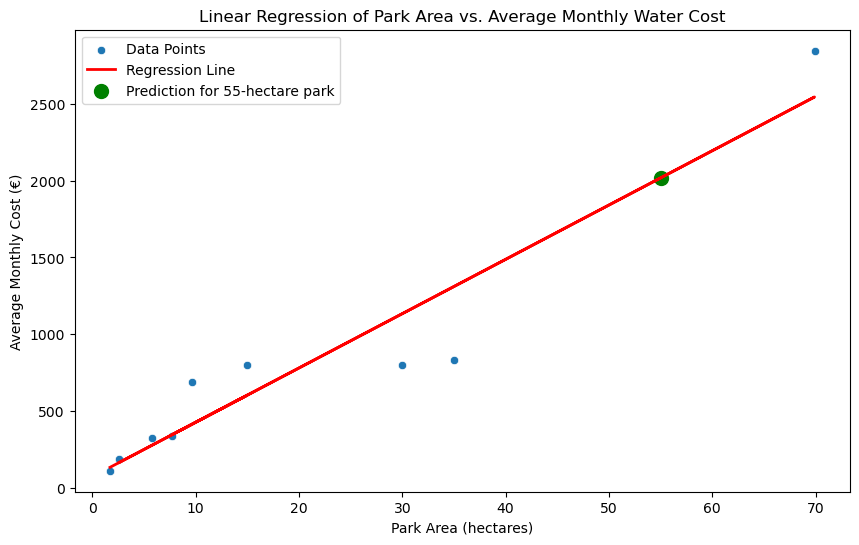

R^2 score: 0.8990591004
Mean Squared Error: 61300.0636761040


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data from CSV files
water_consumption_df = pd.read_csv('water_consumption_updated.csv', delimiter=';', decimal=",")
area_df = pd.read_csv('Area.csv', delimiter=';', decimal=',')

# Convert the date columns (Year, Month, Day) to a single datetime column
water_consumption_df['Date'] = pd.to_datetime(water_consumption_df[['Year', 'Month', 'Day']])

# Group the data by Park, Year, and Month to get monthly water consumption
monthly_consumption_df = water_consumption_df.groupby(['Park', 'Year', 'Month'])['Consumption'].sum().reset_index()

# Function to calculate the monthly cost based on consumption
def calculate_cost(consumption):
    if consumption <= 1000:
        return 0.7 * consumption
    else:
        return 0.7 * consumption * 1.15

# Apply the cost calculation to the monthly consumption data
monthly_consumption_df['Monthly_Cost'] = monthly_consumption_df['Consumption'].apply(calculate_cost)

# Merge the monthly consumption data with the area data
merged_df = monthly_consumption_df.merge(area_df, on='Park')

# Group by Park to get the average monthly cost and area for each park
average_cost_df = merged_df.groupby('Park').agg({'Monthly_Cost': 'mean', 'Area': 'mean'}).reset_index()

# Prepare the independent variable (X) and dependent variable (y) for linear regression
X = average_cost_df[['Area']]
y = average_cost_df['Monthly_Cost']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients
# The coefficient represents the change in the average monthly cost per unit increase in park area
print(f'Coefficient: {model.coef_[0]:.10f}')

# The intercept is the expected average monthly cost when the park area is zero
print(f'Intercept: {model.intercept_:.10f}')

# Predict the average monthly cost for a new park with an area of 55 hectares
# Create a DataFrame for the new park area
new_park_area = pd.DataFrame({'Area': [55]})
predicted_cost = model.predict(new_park_area)
print(f'Predicted average monthly cost for a 55-hectare park: {predicted_cost[0]:.2f} €')

# Plot the data points and the linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Monthly_Cost', data=average_cost_df, label='Data Points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.scatter(55, predicted_cost, color='green', s=100, label='Prediction for 55-hectare park')
plt.xlabel('Park Area (hectares)')
plt.ylabel('Average Monthly Cost (€)')
plt.title('Linear Regression of Park Area vs. Average Monthly Water Cost')
plt.legend()
plt.show()

# Evaluate the model
y_pred = model.predict(X)

# The R^2 score indicates how well the regression line fits the data (1.0 is perfect fit)
print(f'R^2 score: {r2_score(y, y_pred):.10f}')

# The Mean Squared Error (MSE) represents the average of the squares of the errors
# The lower the MSE, the better the model fits the data
print(f'Mean Squared Error: {mean_squared_error(y, y_pred):.10f}')


## Explanation of Key Metrics

- **Coefficient**: The coefficient of the regression line indicates how much the average monthly cost increases for each additional hectare of park area. A positive coefficient means that as the park area increases, the cost increases.

- **Intercept**: The intercept represents the predicted average monthly cost when the park area is zero. It is the point where the regression line intersects the y-axis.

- **R$^2$ Score**: The R$^2$ score, also known as the coefficient of determination, measures how well the regression line approximates the real data points. An R$^2$ score of 1.0 indicates that the regression line perfectly fits the data. An R$^2$ score close to 0 indicates that the line does not fit the data well.

- **Mean Squared Error (MSE)**: The MSE measures the average of the squares of the errors, which are the differences between the observed values and the values predicted by the model.

## Conclusions

From the analysis, we have developed a linear regression model to predict the average monthly cost of water consumption based on the park area. By applying this model, we estimated that the new 55-hectare park will have a predicted monthly water cost of approximately €2017.54.

The feasibility of linear adjustment was confirmed by the fit of the regression line to the data, as visualized in the plot. This suggests that park area is a reasonable predictor of water consumption cost, which aligns with our expectations. However, it's important to note that this model is based on historical data, and actual costs may vary due to other factors not accounted for in this analysis.

# US16

**• US16**- Consider the data and results associated with US14. Applying polynomial regression, determine the best line that fits the data. Students who did not take US14 must use the data contained in the file ”solution us14.csv”.

## Introduction

In this analysis, we aim to apply polynomial regression to model the relationship between the size and time variables contained in the dataset solution_us14.csv. Polynomial regression is a form of regression analysis where the relationship between the independent variable $x$ and the dependent variable $y$ is modeled as an 
$n$-th degree polynomial. This type of regression is useful for capturing non-linear relationships in data. We will determine the best-fitting polynomial line for the given data and evaluate the model's performance.

## Formulas

The general form of a polynomial regression model is given by: $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_m x^m + \epsilon$

Where:
- $y$ is the dependent variable.
- $x$ is the independent variable.
- $\beta_0$ is the constant of the polynomial regression equation.
- $\beta_i$ is the coefficient of the regression associated to $x^i, i=1, ...,m$.
- $\epsilon$ is the error or residual, that is, the difference between the observed value and the value estimated by the model.


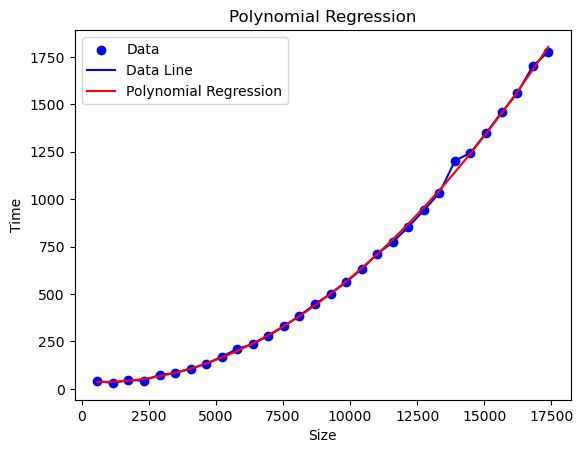

Polynomial Regression Coefficients:
Degree 0: 0.0000000000
Degree 1: -0.0090887210
Degree 2: 0.0000063517
Intercept: 39.2749800870
R^2 score: 0.9993172843
Mean Squared Error: 203.7346935749


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv("efficiencyData.csv", delimiter=';', decimal=',', header=None, names=['size', 'time'])
#data = pd.read_csv("solution_us14.csv", delimiter=';', decimal=',')

# Extract the independent variable (size) and the dependent variable (time)
X = data['size'].values.reshape(-1, 1)
y = data['time'].values

# Define the degree of the polynomial regression based on the Kruskal algorithm but can be adjusted
degree = 2  # You can adjust this value as needed

# Transform the features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict the response for the training data
y_pred = model.predict(X_poly)

# Plot the data points
plt.scatter(X, y, color='blue', label='Data')

# Add a line connecting the data points
plt.plot(X, y, color='blue', linestyle='solid', label='Data Line')

# Add the best-fitting polynomial regression line
plt.plot(X, y_pred, color='red', label='Polynomial Regression')

# Set the labels and title of the plot
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

# Print the coefficients of the polynomial regression model with 4 decimal places
print("Polynomial Regression Coefficients:")
for i in range(degree + 1):
    print(f"Degree {i}: {model.coef_[i]:.10f}")
print(f"Intercept: {model.intercept_:.10f}")

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
print(f"R^2 score: {r2_score(y, y_pred):.10f}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred):.10f}")


# Explanation of Key Metrics


- **Coefficient**: The coefficients of the polynomial regression model indicate the relationship between the independent variable (size) and the dependent variable (time). Each coefficient corresponds to the degree of the polynomial term.

- **Intercept**: The intercept represents the predicted value of the dependent variable when the independent variable is zero.

- **R$^2$ Score**: The R$^2$ score, also known as the coefficient of determination, measures how well the regression model fits the data. An R$^2$ score of 1 indicates perfect fit, while a score closer to 0 indicates poor fit.

- **Mean Squared Error (MSE)**: The MSE measures the average of the squares of the errors, which are the differences between the observed values and the predicted values by the model.

# Conclusion

The polynomial regression model was successfully applied to the dataset, providing a best-fitting polynomial line. The coefficients and intercept of the model were determined, and the model's performance was evaluated using the R$^2$ score and Mean Squared Error (MSE). These metrics help us understand how well the model captures the relationship between the size and time variables.

The visualization of the data points and the regression line further aids in interpreting the model's fit to the data.

# Team members contribution

| Student Number | Contribution |
| :-------------: | :---------: |
| 1120629        | 20%          |
| 1201933        | 20%          |
| 1220961        | 20%          |
| 1221967        | 20%          |
| 1230401        | 20%          |
